In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
os.getcwd()

'C:\\Users\\aabas\\Desktop\\Jupyter Notebooks\\Kaggle Codes'

In [8]:
df=pd.read_csv("C:\\Users\\aabas\\Desktop\\Jupyter Notebooks\\Kaggle Codes\\Credit Card Customers\\BankChurners.csv")

In [12]:
df=df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
],axis=1)

In [13]:
df=df.drop("CLIENTNUM",axis=1)

In [14]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [16]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [18]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [19]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

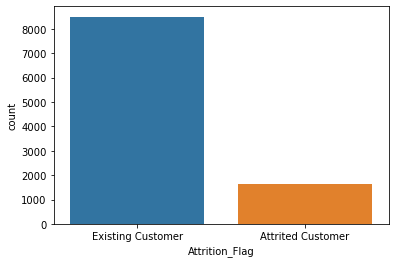

In [20]:
sns.countplot(data=df,x="Attrition_Flag")

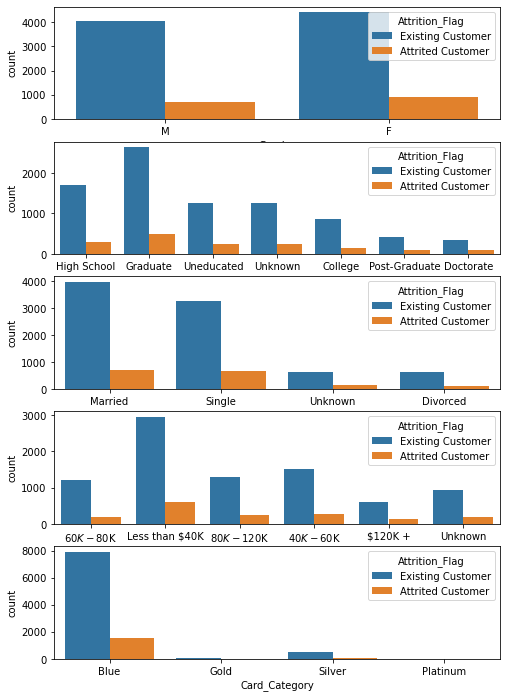

In [31]:
categorical = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
fig,axes = plt.subplots(len(categorical),figsize=(8,12))
counter=0
for category in categorical:
    sns.countplot(data=df, hue="Attrition_Flag",x=category,ax=axes[counter])
    counter+=1

In [76]:
perc=df.groupby("Card_Category")["Attrition_Flag"].value_counts(normalize=True)
perc

Card_Category  Attrition_Flag   
Blue           Existing Customer    0.839021
               Attrited Customer    0.160979
Gold           Existing Customer    0.818966
               Attrited Customer    0.181034
Platinum       Existing Customer    0.750000
               Attrited Customer    0.250000
Silver         Existing Customer    0.852252
               Attrited Customer    0.147748
Name: Attrition_Flag, dtype: float64

In [77]:
perc=perc.rename("ratio").reset_index()
perc

,Card_Category,Attrition_Flag,ratio
0,Blue,Existing Customer,0.839021
1,Blue,Attrited Customer,0.160979
2,Gold,Existing Customer,0.818966
3,Gold,Attrited Customer,0.181034
4,Platinum,Existing Customer,0.750000
5,Platinum,Attrited Customer,0.250000
6,Silver,Existing Customer,0.852252
7,Silver,Attrited Customer,0.147748


<AxesSubplot:xlabel='Card_Category', ylabel='ratio'>

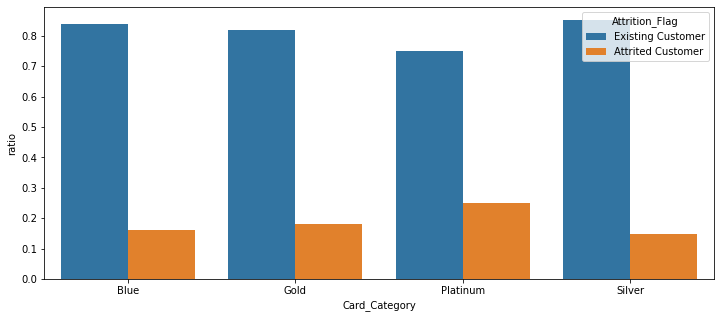

In [82]:
plt.figure(figsize=(12,5))
sns.barplot(data=perc,x="Card_Category",y="ratio",hue="Attrition_Flag")

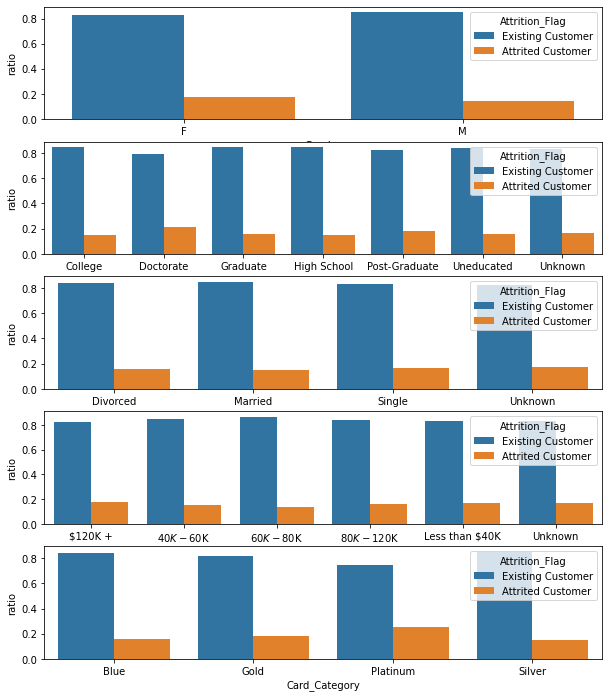

In [87]:
categorical = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
fig,axes = plt.subplots(len(categorical),figsize=(10,12))
counter=0
for category in categorical:
    perc=df.groupby(category)["Attrition_Flag"].value_counts(normalize=True)
    perc=perc.rename("ratio").reset_index()
    sns.barplot(data=perc,x=category,y="ratio",hue="Attrition_Flag",ax=axes[counter])
    counter+=1

In [90]:
a=pd.crosstab(df["Income_Category"],df["Attrition_Flag"])
print(a)
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(a)
print('p values are:',p)
if p>0.05:
    print('null hypothesis "Income_Category and Result are independent" is not rejected')
if p<0.05:
    print('null hypothesis "Income_Category and Result are independent" is rejected')

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                        126                601
$40K - $60K                    271               1519
$60K - $80K                    189               1213
$80K - $120K                   242               1293
Less than $40K                 612               2949
Unknown                        187                925
p values are: 0.025002425704390617
null hypothesis "Income_Category and Result are independent" is rejected


In [91]:
categorical = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
counter=0
for category in categorical:
    a=pd.crosstab(df[category],df["Attrition_Flag"])
    print(a)
    c, p, dof, expected = chi2_contingency(a)
    print('p values are:',p)
    if p>0.05:
        print(f'null hypothesis "{category} and Result are independent" is not rejected')
    if p<0.05:
        print(f'null hypothesis "{category} and Result are independent" is rejected')

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4428
M                             697               4072
p values are: 0.00019635846717310307
null hypothesis "Gender and Result are independent" is rejected
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                        154                859
Doctorate                       95                356
Graduate                       487               2641
High School                    306               1707
Post-Graduate                   92                424
Uneducated                     237               1250
Unknown                        256               1263
p values are: 0.05148913147336634
null hypothesis "Education_Level and Result are independent" is not rejected
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                       

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Attrition_Flag"]=encoder.fit_transform(df["Attrition_Flag"])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [93]:
df=df[df["Education_Level"]!="Unknown"]

In [94]:
df_gender = pd.get_dummies(df["Gender"])
df = pd.concat([df,df_gender], axis=1)
df = df.drop("Gender",axis=1)
df_married = pd.get_dummies(df["Marital_Status"])
df = pd.concat([df,df_married], axis=1)
df = df.drop('Marital_Status',axis=1)
df_Card_Category = pd.get_dummies(df["Card_Category"])
df = pd.concat([df,df_Card_Category], axis=1)
df = df.drop('Card_Category',axis=1)

In [95]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,F,M,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,1,45,3,High School,$60K - $80K,39,5,1,3,12691.0,...,0,1,0,1,0,0,1,0,0,0
1,1,49,5,Graduate,Less than $40K,44,6,1,2,8256.0,...,1,0,0,0,1,0,1,0,0,0
2,1,51,3,Graduate,$80K - $120K,36,4,1,0,3418.0,...,0,1,0,1,0,0,1,0,0,0
3,1,40,4,High School,Less than $40K,34,3,4,1,3313.0,...,1,0,0,0,0,1,1,0,0,0
4,1,40,3,Uneducated,$60K - $80K,21,5,1,0,4716.0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,1,56,1,Graduate,Less than $40K,50,4,1,4,3688.0,...,1,0,0,0,1,0,1,0,0,0
10122,1,50,2,Graduate,$40K - $60K,40,3,2,3,4003.0,...,0,1,0,0,1,0,1,0,0,0
10124,0,44,1,High School,Less than $40K,36,5,3,4,5409.0,...,1,0,0,1,0,0,1,0,0,0
10125,0,30,2,Graduate,$40K - $60K,36,4,3,3,5281.0,...,0,1,0,0,0,1,1,0,0,0


In [120]:
mapping={'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
df=df.replace(mapping)

In [124]:
ed_mapping = {'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
df=df.replace(ed_mapping)

In [125]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,F,M,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,1,45,3,2,3,39,5,1,3,12691.0,...,0,1,0,1,0,0,1,0,0,0
1,1,49,5,4,1,44,6,1,2,8256.0,...,1,0,0,0,1,0,1,0,0,0
2,1,51,3,4,4,36,4,1,0,3418.0,...,0,1,0,1,0,0,1,0,0,0
3,1,40,4,2,1,34,3,4,1,3313.0,...,1,0,0,0,0,1,1,0,0,0
4,1,40,3,1,3,21,5,1,0,4716.0,...,0,1,0,1,0,0,1,0,0,0


In [128]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC()))
models.append(('Random_Forest',RandomForestClassifier()))
results = []
names = []
cross_validate_fs=[]
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    cross_validate_fs.append(cv_results.mean())
    print("%s: %f " % (name, cv_results.mean()))

KNN: 0.935508 
DecisionTree: 0.962107 
XGB: 0.983019 
SVM: 0.949572 
Random_Forest: 0.975501 


In [167]:
colsample_bytree = [0.1,0.3,0.5,1.0,1.5,2]
gamma = [0,0.1,0.5,1,1.5,2,5]
learning_rate = [0.001,0.01,0.05,0.08,0.1,1]
min_child_weight = [0.5,1,5,10,20,30,40]
scale_pos_weight = [0.5,1,2,4,6]
subsample = [0.1,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_estimators = [10,25,50,100,150,200,250,300,400,500]
max_depth = [3,5,10,20,40,100]

In [168]:
param_grid = dict(
    colsample_bytree = colsample_bytree,
    gamma = gamma,
    learning_rate = learning_rate,
    min_child_weight = min_child_weight,
    scale_pos_weight = scale_pos_weight,
    subsample = subsample,
    n_estimators = n_estimators,
    max_depth = max_depth
)

In [169]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
best_model = XGBClassifier(random_state=1,verbosity=1)
grid_search = RandomizedSearchCV(estimator=best_model,param_distributions=param_grid,scoring="f1")
final_model=grid_search.fit(X_train,y_train)
print("Optimum parameters",final_model.best_params_)

C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aabas\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\aabas\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\aabas\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\aabas\anaconda3\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\aabas\anaconda3\lib\site-packages\xgboost\core.py", line 1733, in update
    _check_call(_LIB.X

Optimum parameters {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 25, 'min_child_weight': 30, 'max_depth': 40, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [171]:
tuned_model=XGBClassifier(subsample=0.9,scale_pos_weight= 1,n_estimators=500,
                          min_child_weight=0.5, max_depth=40, learning_rate=0.001, gamma=5, colsample_bytree= 1)
kfold = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cv_results = cross_val_score(tuned_model, X_train, y_train, cv=kfold, scoring='f1')
print("f1=" , cv_results.mean())

f1= 0.9717240214282793
